In [757]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [758]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [759]:
# drop uncomplete rows
df.dropna(inplace=True)

# drop 'material' column because it has categorical features
df.drop(['material'], axis=1, inplace=True)

In [760]:
# calculating the correlation matrix
correlation_matrix = df.corr()

In [761]:
correlation_matrix

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,encoded_material,error
tdoa12,1.000000,-0.051369,0.460529,-0.538508,-0.147222,0.155772,0.142932,-0.444087,-0.158414,0.082664,-0.411062,-0.157030,-0.118075,0.999997
tdoa21,-0.051369,1.000000,-0.048791,0.052934,0.002026,-0.014346,-0.012057,0.040507,0.009393,-0.013777,0.040007,0.013970,0.020489,-0.051368
snr_an1,0.460529,-0.048791,1.000000,-0.866003,-0.052190,0.087185,0.192488,-0.535610,-0.144544,0.103190,-0.464361,-0.142259,0.021918,0.461249
power_dif_an1,-0.538508,0.052934,-0.866003,1.000000,0.105658,-0.169814,-0.240972,0.678826,0.218566,-0.131677,0.603469,0.214816,-0.043822,-0.539058
snr_an2,-0.147222,0.002026,-0.052190,0.105658,1.000000,0.011591,-0.029641,0.137918,0.062335,-0.024058,0.141009,0.053882,0.176065,-0.146879
power_dif_an2,0.155772,-0.014346,0.087185,-0.169814,0.011591,1.000000,0.069976,-0.236973,-0.128059,0.045613,-0.235399,-0.129356,-0.051098,0.155357
an1_rx_snr,0.142932,-0.012057,0.192488,-0.240972,-0.029641,0.069976,1.000000,-0.418269,-0.119389,0.052315,-0.220404,-0.104851,0.105056,0.143041
an1_rx_powerdif,-0.444087,0.040507,-0.535610,0.678826,0.137918,-0.236973,-0.418269,1.000000,0.238394,-0.144382,0.640915,0.244923,-0.104886,-0.444183
an1_tof,-0.158414,0.009393,-0.144544,0.218566,0.062335,-0.128059,-0.119389,0.238394,1.000000,-0.044012,0.221443,0.538442,-0.114443,-0.158126
an2_rx_snr,0.082664,-0.013777,0.103190,-0.131677,-0.024058,0.045613,0.052315,-0.144382,-0.044012,1.000000,-0.263346,-0.049244,0.062356,0.082708


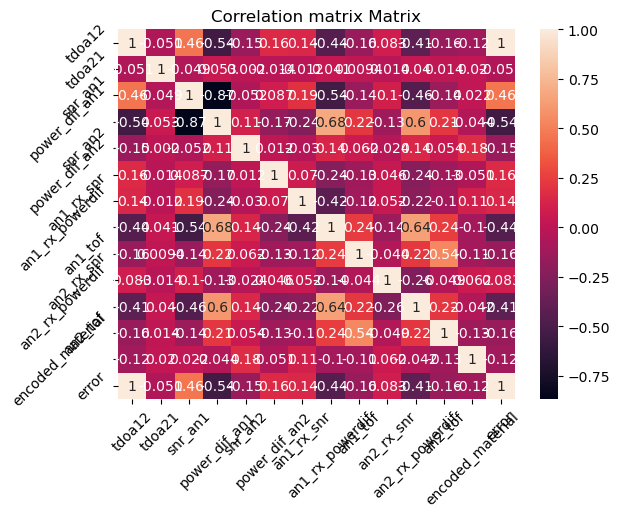

In [762]:
plt.figure()
cm = sns.heatmap(correlation_matrix, annot=True)

# Rotate x-axis and y-axis tick labels at a slight angle
cm.set_xticklabels(cm.get_xticklabels(), rotation=45)
cm.set_yticklabels(cm.get_yticklabels(), rotation=45)

plt.title('Correlation matrix Matrix')
plt.show()

In [763]:
cm = correlation_matrix.to_numpy()
feature_names = df.columns

In [764]:
cm.shape

(14, 14)

In [765]:
len(feature_names)

14

In [766]:
def correlation_matrix_interpreter(cm, feature_names):
    # interpretations = dict()
    perf_neg_corr = list()
    str_neg_corr = list()
    mod_neg_corr = list()
    weak_neg_corr = list()
    no_corr = list()
    perf_pos_corr = list()
    str_pos_corr = list()
    mod_pos_corr = list()
    weak_pos_corr = list()

    i = 0
    for row in range(0, cm.shape[0]):
        for col in range(0, cm.shape[1]):
            # get the correlation value
            c = cm[row, col]
            # interp = ""
            if c == -1.0: 
                # interp = f"Perfect Negative Correlation"
                perf_neg_corr.append({feature_names[row], feature_names[col]})
            elif -1.0 < c and c <= -0.7: 
                #interp = f"Strong Negative Correlation"
                str_neg_corr.append({feature_names[row], feature_names[col]})
            elif -0.7 < c and c <= -0.3: 
                 #interp = f"Moderate Negative Correlation"
                mod_neg_corr.append({feature_names[row], feature_names[col]})
            elif -0.3 < c and c < 0: 
                # interp = f"Weak Negative Correlation"
                weak_neg_corr.append({feature_names[row], feature_names[col]})
            elif c == 0: 
                # interp = f"No Correlation"
                no_corr.append({feature_names[row], feature_names[col]})
            elif 0 < c and c <= 0.3: 
                # interp = f"Weak Positive Correlation"
                weak_pos_corr.append({feature_names[row], feature_names[col]})
            elif 0.3 < c and c <= 0.7: 
                 # interp = f"Moderate Positive Correlation"
                mod_pos_corr.append({feature_names[row], feature_names[col]})
            elif 1.0 < c and c <= 0.7: 
                # interp = f"Strong Positive Correlation"
                str_pos_corr.append({feature_names[row], feature_names[col]})
            elif c == 1.0: 
                # interp = f"Perfect Positive Correlation"
                perf_pos_corr.append({feature_names[row], feature_names[col]})

            # interpretations[f"{feature_names[row]} and {feature_names[col]}"] = interp
    perf_neg_corr = set(map(frozenset, perf_neg_corr))
    str_neg_corr = set(map(frozenset, str_neg_corr))
    mod_neg_corr = set(map(frozenset, mod_neg_corr))
    weak_neg_corr = set(map(frozenset, weak_neg_corr))
    no_corr = set(map(frozenset, no_corr))
    weak_pos_corr = set(map(frozenset, weak_pos_corr))
    mod_pos_corr = set(map(frozenset, mod_pos_corr))
    str_pos_corr = set(map(frozenset, str_pos_corr))
    perf_pos_corr = set(map(frozenset,  perf_pos_corr))

    # return interpretations
    return perf_neg_corr, str_neg_corr, mod_neg_corr, weak_neg_corr, no_corr, weak_pos_corr, mod_pos_corr, str_pos_corr, perf_pos_corr



In [767]:
a = -0.8660034579061356 
if -0.7 > a and a <= -0.3: 
    print(f"True {a} ")

True -0.8660034579061356 


In [768]:
perf_neg_corr, str_neg_corr, mod_neg_corr, weak_neg_corr, no_corr, weak_pos_corr, mod_pos_corr, str_pos_corr, perf_pos_corr = correlation_matrix_interpreter(cm, feature_names)

In [769]:
print("These Features have Perfect Negative Correlation")
if perf_neg_corr : 
    for s in perf_neg_corr: print(s)
else : 
    print ("There are none")

These Features have Perfect Negative Correlation
There are none


In [770]:
print("These Features have Strong Negative Correlation")
if str_neg_corr : 
    print(f"There are {len(str_neg_corr)}")
    for s in str_neg_corr: print(set(s))
else : 
    print ("There are none")

These Features have Strong Negative Correlation
There are 1
{'power_dif_an1', 'snr_an1'}


In [771]:
print("These Features have Moderate Negative Correlation")
if mod_neg_corr : 
    print(f"There are {len(mod_neg_corr)}")
    for s in mod_neg_corr: print(set(s))
else : 
    print ("There are none")

These Features have Moderate Negative Correlation
There are 9
{'tdoa12', 'an2_rx_powerdif'}
{'power_dif_an1', 'tdoa12'}
{'snr_an1', 'an2_rx_powerdif'}
{'power_dif_an1', 'error'}
{'an2_rx_powerdif', 'error'}
{'snr_an1', 'an1_rx_powerdif'}
{'an1_rx_snr', 'an1_rx_powerdif'}
{'an1_rx_powerdif', 'tdoa12'}
{'an1_rx_powerdif', 'error'}


In [772]:
print("These Features have Weak Negative Correlation")
if weak_neg_corr : 
    print(f"There are {len(weak_neg_corr)}")
    for s in weak_neg_corr: print(set(s))
else : 
    print ("There are none")

These Features have Weak Negative Correlation
There are 39
{'snr_an1', 'snr_an2'}
{'an2_rx_snr', 'snr_an2'}
{'an2_tof', 'power_dif_an2'}
{'power_dif_an1', 'encoded_material'}
{'encoded_material', 'error'}
{'an2_tof', 'an2_rx_snr'}
{'an2_tof', 'tdoa12'}
{'an1_rx_snr', 'snr_an2'}
{'tdoa21', 'power_dif_an2'}
{'power_dif_an1', 'power_dif_an2'}
{'snr_an2', 'tdoa12'}
{'an2_tof', 'encoded_material'}
{'error', 'an1_tof'}
{'tdoa12', 'an1_tof'}
{'an1_rx_snr', 'an1_tof'}
{'snr_an1', 'an1_tof'}
{'an2_tof', 'error'}
{'encoded_material', 'an2_rx_powerdif'}
{'tdoa12', 'encoded_material'}
{'an1_rx_snr', 'tdoa21'}
{'tdoa21', 'snr_an1'}
{'an2_rx_snr', 'an1_tof'}
{'an2_rx_snr', 'tdoa21'}
{'tdoa21', 'tdoa12'}
{'an2_rx_snr', 'power_dif_an1'}
{'tdoa21', 'error'}
{'an1_rx_powerdif', 'power_dif_an2'}
{'an1_tof', 'power_dif_an2'}
{'an1_rx_snr', 'an2_tof'}
{'an2_rx_snr', 'an1_rx_powerdif'}
{'an1_rx_snr', 'power_dif_an1'}
{'encoded_material', 'an1_tof'}
{'an1_rx_powerdif', 'encoded_material'}
{'an1_rx_snr', 'an2

In [773]:
print("These Features have No Correlation")
if no_corr : 
    print(f"There are {len(no_corr)}")
    for s in no_corr: print(set(s))
else : 
    print ("There are none")

These Features have No Correlation
There are none


In [774]:
print("These Features have Weak Positive Correlation")
if weak_pos_corr : 
    print(f"There are {len(weak_pos_corr)}")
    for s in weak_pos_corr: print(set(s))
else : 
    print ("There are none")

These Features have Weak Positive Correlation
There are 35
{'an2_rx_powerdif', 'an1_tof'}
{'snr_an2', 'an1_tof'}
{'tdoa21', 'snr_an2'}
{'an2_tof', 'an1_rx_powerdif'}
{'power_dif_an1', 'snr_an2'}
{'an2_rx_snr', 'encoded_material'}
{'an1_rx_snr', 'tdoa12'}
{'tdoa21', 'encoded_material'}
{'an1_rx_powerdif', 'an1_tof'}
{'an2_tof', 'power_dif_an1'}
{'an2_tof', 'tdoa21'}
{'snr_an2', 'an1_rx_powerdif'}
{'error', 'power_dif_an2'}
{'an2_rx_snr', 'power_dif_an2'}
{'tdoa21', 'an1_tof'}
{'snr_an2', 'an2_rx_powerdif'}
{'an2_rx_snr', 'error'}
{'snr_an1', 'power_dif_an2'}
{'an1_rx_snr', 'power_dif_an2'}
{'an1_rx_snr', 'error'}
{'an2_tof', 'an2_rx_powerdif'}
{'power_dif_an1', 'an1_tof'}
{'an2_rx_snr', 'snr_an1'}
{'tdoa21', 'power_dif_an1'}
{'an1_rx_snr', 'snr_an1'}
{'snr_an2', 'encoded_material'}
{'tdoa21', 'an1_rx_powerdif'}
{'an2_tof', 'snr_an2'}
{'an1_rx_snr', 'an2_rx_snr'}
{'snr_an2', 'power_dif_an2'}
{'an2_rx_snr', 'tdoa12'}
{'tdoa21', 'an2_rx_powerdif'}
{'tdoa12', 'power_dif_an2'}
{'an1_rx_snr',

In [775]:
print("These Features have Moderate Positive Correlation")
if mod_pos_corr : 
    print(f"There are {len(mod_pos_corr)}")
    for s in mod_pos_corr: print(set(s))
else : 
    print ("There are none")

These Features have Moderate Positive Correlation
There are 6
{'power_dif_an1', 'an1_rx_powerdif'}
{'an1_rx_powerdif', 'an2_rx_powerdif'}
{'snr_an1', 'error'}
{'power_dif_an1', 'an2_rx_powerdif'}
{'snr_an1', 'tdoa12'}
{'an2_tof', 'an1_tof'}


In [776]:
print("These Features have Strong Positive Correlation")
if str_pos_corr : 
    print(f"There are {len(str_pos_corr)}")
    for s in str_pos_corr: print(set(s))
else : 
    print ("There are none")

These Features have Strong Positive Correlation
There are none


In [777]:
print("These Features have Perfect Positive Correlation")
if perf_pos_corr : 
    print(f"There are {len(perf_pos_corr)}")
    for s in perf_pos_corr: print(set(s))
else : 
    print ("There are none")

These Features have Perfect Positive Correlation
There are 14
{'an2_tof'}
{'an1_rx_powerdif'}
{'tdoa12'}
{'an1_tof'}
{'an2_rx_snr'}
{'snr_an1'}
{'power_dif_an1'}
{'an1_rx_snr'}
{'an2_rx_powerdif'}
{'error'}
{'tdoa21'}
{'snr_an2'}
{'encoded_material'}
{'power_dif_an2'}
